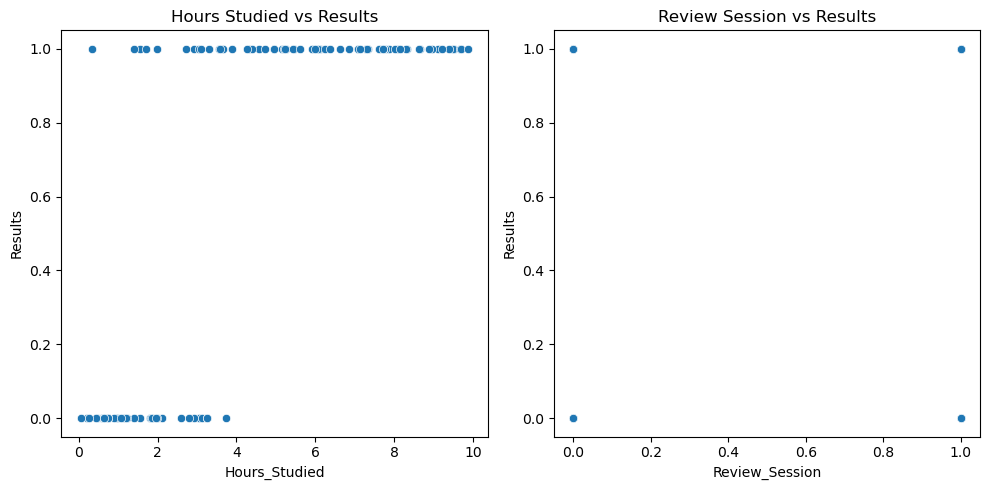

Coefficients: [[1.36542016 1.87797591]]
Intercept: [-4.61373892]
Accuracy: 0.93
AUC: 0.9761029411764706


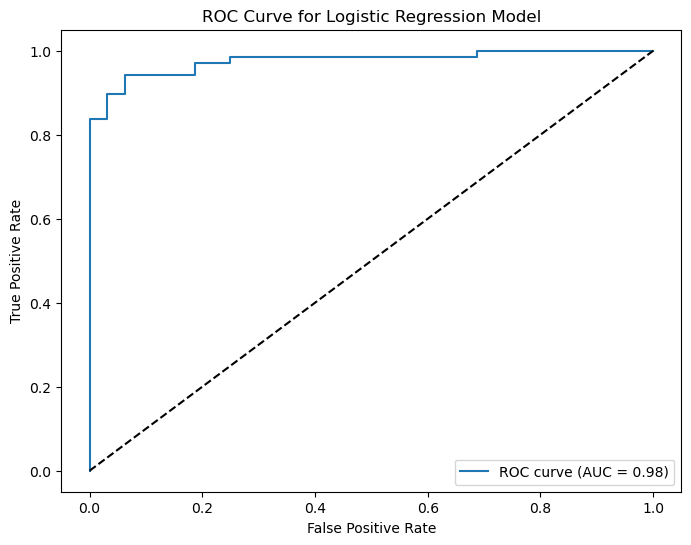

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Step 1: Load the dataset
file_path = 'C:/Users/Ommo Clark/Downloads/student_data.csv'
student_data = pd.read_csv(file_path)

# Step 2: Visualization of the data
plt.figure(figsize=(10, 5))

# Plot Hours_Studied vs Results
plt.subplot(1, 2, 1)
sns.scatterplot(x='Hours_Studied', y='Results', data=student_data)
plt.title('Hours Studied vs Results')

# Plot Review_Session vs Results
plt.subplot(1, 2, 2)
sns.scatterplot(x='Review_Session', y='Results', data=student_data)
plt.title('Review Session vs Results')

plt.tight_layout()
plt.show()

# Step 3: Fit a logistic regression model
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Initialize and fit the model
model = LogisticRegression()
model.fit(X, y)

# Step 4: Output model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Predict on the same dataset
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

# Step 5: Calculate performance metrics: accuracy, AUC, and ROC
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Output coefficients, intercept, accuracy, and AUC
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


In [3]:
# Required libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
file_path = 'C:/Users/Ommo Clark/Downloads/student_data.csv'
student_data = pd.read_csv(file_path)

# Prepare the features (X) and the target (y)
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Fit an SVM model with a Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred_linear = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {linear_accuracy}")

# Step 3: Fit an SVM model with an RBF kernel and use GridSearchCV to find the best gamma
# Define the parameter grid
param_grid = {
    'gamma': [0.01, 0.1, 1, 10, 100],  # Values for gamma to test
    'C': [1, 10, 100]  # Regularization parameter
}

# Initialize the RBF SVM model
rbf_svm = SVC(kernel='rbf')

# Initialize GridSearchCV with k-fold cross-validation
grid_search = GridSearchCV(rbf_svm, param_grid, cv=KFold(n_splits=5), scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters for RBF Kernel: {best_params}")

# Step 4: Evaluate the RBF model on the test set with the best gamma
best_rbf_svm = grid_search.best_estimator_
y_pred_rbf = best_rbf_svm.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel (best gamma): {rbf_accuracy}")


Accuracy with Linear Kernel: 0.8666666666666667
Best parameters for RBF Kernel: {'C': 100, 'gamma': 0.01}
Accuracy with RBF Kernel (best gamma): 0.8666666666666667


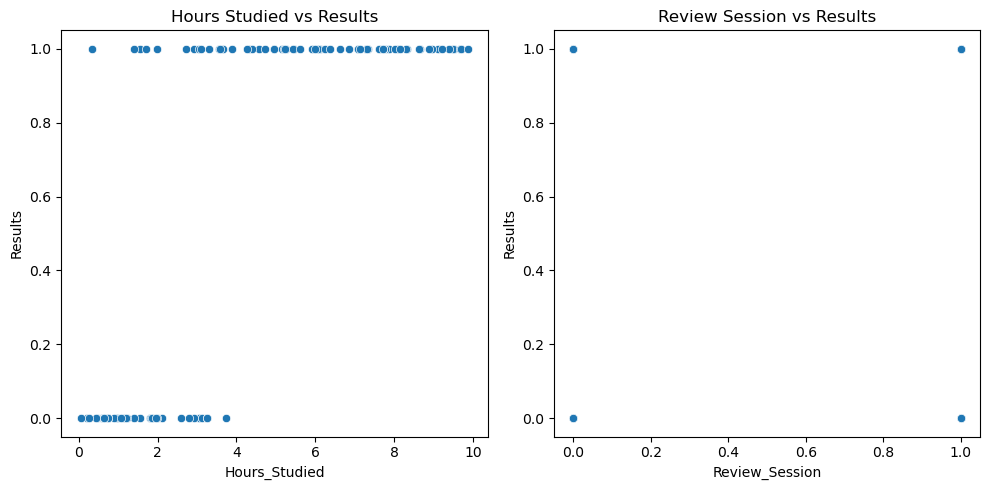

Linear SVM Accuracy: 0.92
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation accuracy: 0.93
RBF SVM Train Accuracy: 0.93


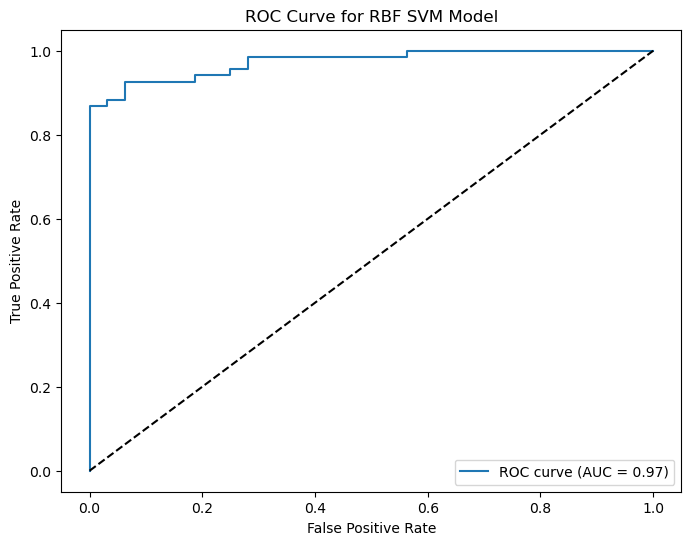

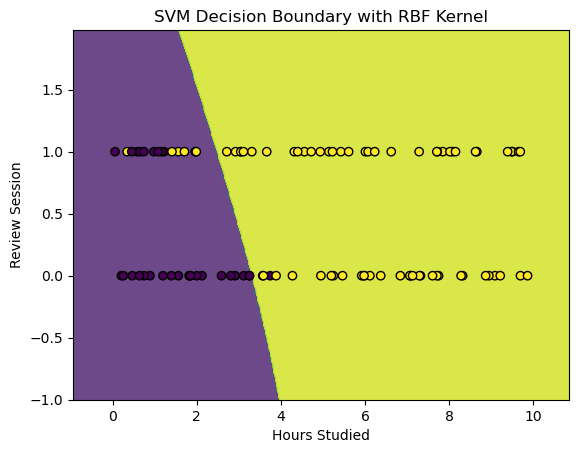

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import seaborn as sns

# Load the dataset (replace with your dataset path)
file_path = 'C:/Users/Ommo Clark/Downloads/student_data.csv'
student_data = pd.read_csv(file_path)

# Define the features (Hours_Studied and Review_Session) and the target variable (Results)
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Visualize the data
plt.figure(figsize=(10, 5))

# Plot Hours_Studied vs Results
plt.subplot(1, 2, 1)
sns.scatterplot(x='Hours_Studied', y='Results', data=student_data)
plt.title('Hours Studied vs Results')

# Plot Review_Session vs Results
plt.subplot(1, 2, 2)
sns.scatterplot(x='Review_Session', y='Results', data=student_data)
plt.title('Review Session vs Results')

plt.tight_layout()
plt.show()

# Step 1: SVM with a Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# Predict on the training data and calculate accuracy
y_pred_linear = svm_linear.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")

# Step 2: SVM with RBF Kernel and Grid Search for Hyperparameter Tuning
# Define the SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Define a parameter grid for C and gamma values
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]  # Kernel coefficient
}

# Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X, y)

# Output the best parameters and the corresponding accuracy
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Step 3: Train the best model from the grid search
best_svm_rbf = grid_search.best_estimator_
y_pred_rbf = best_svm_rbf.predict(X)
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f"RBF SVM Train Accuracy: {accuracy_rbf:.2f}")

# Step 4: Plot ROC Curve for the best RBF SVM model
y_pred_proba_rbf = best_svm_rbf.decision_function(X)
fpr, tpr, thresholds = roc_curve(y, y_pred_proba_rbf)
auc_rbf = roc_auc_score(y, y_pred_proba_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RBF SVM Model')
plt.legend(loc='lower right')
plt.show()

# Step 5: Plot the decision boundary for the RBF SVM
# Create a meshgrid for plotting the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X['Hours_Studied'].min() - 1, X['Hours_Studied'].max() + 1
y_min, y_max = X['Review_Session'].min() - 1, X['Review_Session'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a DataFrame for the meshgrid points (to avoid the feature name warning)
Z_input = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Hours_Studied', 'Review_Session'])

# Predict using the best RBF SVM model
Z = best_svm_rbf.predict(Z_input)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X['Hours_Studied'], X['Review_Session'], c=y, edgecolors='k', marker='o')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.show()
